# SESONAL DECOMPOSITION

The decomposition procedure is to describe the trend and seasonality

Goal: to estimate the seasonal effects that can be used to create and presnet seasonally adjusted values, thus removing the seasonal effect from a value so that trends can be seen more clearly

## DECOMPOSITION MODELS

There are 2 decomposition models: 

1. Additive:  $x_t = trend + seasonal + random $
--> The Additive model is used when seasonal variation is constant over time 
--> The additive model is linear 

2. Multiplicative: $x_t = trend * seasonal * random $
--> The Multiplicative model is used when seasonal variation is positive over time (changes increase or decrease over time)
--> The multiplicative model is nonlinear




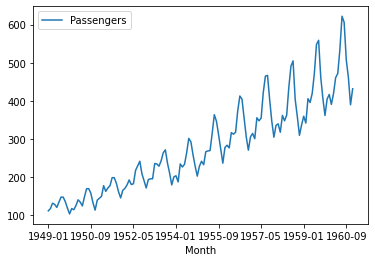

In [3]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm 
from random import randrange
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the Airline Passengers dataset
series = pd.read_csv('airline_passengers.csv', header = 0, index_col = 0)
series.plot()
plt.show()

For above data, we will try the Multiplicative model

## DECOMPOSITION STEPS

### STEP 1: ESTIMATE THE TREND VALUES

This step can be done by: 
1. moving averages or 
2. modeling the trend with regression model 

### STEP 2:  'DE-TREND' THE SERIES
1. For additive model: subtract the trend estimates (from step 1) from the series 
2. For multiplicative model: divide the series by the trend value

### STEP 3: ESTIMATE SEASONAL FACTORS 
The seasonal factors are estimated using the 'de-trend' series found in step 2. A common way to do it is averaging the de-trend values for a specific season 

### STEP 4: DETERMINE THE RANDOM (IRREGULAR) COMPONENT 

127.24999999999999


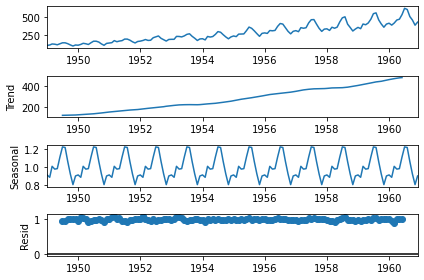

<Figure size 1440x720 with 0 Axes>

In [4]:
# DECOMPOSE THE 'AIRLINE PASSENTERS' DATASET USING MULTIPLICATIVE MODEL 
series = pd.read_csv('airline_passengers.csv')
series.Month = pd.to_datetime(series.Month, errors = 'coerce')
series = series.set_index('Month')
result = seasonal_decompose(series, model = 'multiplicative')
result.plot()
plt.figure(figsize=(20,10))
print(result.trend[7])
#print(series)
#len(result.trend)

### Estimate the Trend Values: One-sided vs. Two-sided Filters for Moving Averages

The function `seasonal_decompose()` uses moving averages for its first step. The calculation of trend values of `seasonal_decompose()` follows two-sided filter calculation from `statsmodels.tsa.filters.filtertools.convolution_filter()` by default. If use one-sided filter, set the argument `two_sided = False`. 

1. One-sided filter: is used when we want to use only past values from the time for which we're smoothig

Example: For quarterly data, at time $t$, if use one-side filter, we can define a smoothed value for time $t$ as:
$$ \frac{1}{4} (x_{t} + x_{t-1} + x_{t-2} + x_{t-3}) $$


2. Two-sided filter: is used when we want to use values that come from before and after the time for which we're smoothing

Example: For monthly data, the smoothed value for time $t$ is:
$$\frac{1}{24} x_{t-6} + \frac{1}{12}x_{t-5} + \frac{1}{12} x_{t-4} + \dots + \frac{1}{12} x_{t+5} + \frac{1}{24}x_{t+6}$$


### Notes on `seasonal_decompose()`

The function's default arguments include: 

`seasonal_decompose(x, model = "additive", filt = None, period = None, two_sided = True, extrapolate_trend = 0)`

Notes on the parameters: 

`filt` : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
        
`two_sided`: If False, moving averages use only past values (one-sided filter)